# **1. Perkenalan Dataset**


**Sumber Dataset**:  
   Dataset yang akan saya pakai untuk proyek akhir ini diperoleh dari https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset. Dataset ini mensimulasikan pengajuan pinjaman dan hasil persetujuan untuk 2.000 individu. Dataset ini berisi atribut demografis, finansial, dan atribut lain terkait pekerjaan yang dapat digunakan untuk memprediksi apakah pengajuan pinjaman akan disetujui atau ditolak. Dataset ini sangat ideal untuk masalah klasifikasi, pemodelan risiko kredit, dan rekayasa fitur untuk dataset finansial.


# **2. Import Library**

Berikut beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning proyek ini.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Dataset loan_approval_raw.csv sudah termuat ke df_raw. Sudah terlihat struktur datasetnya terdiri dari kolom name, city, income, credit_score, loan_amount, year_employed, points, dan loan_approved (target). Dapat dilihat beberapa baris awal dari dataset dengan df_raw.head()

In [26]:
df_raw = pd.read_csv(r'C:\Users\User\Downloads\SMSML_Muhammad-Hafidz-Rizki\Eksperimen_SML_Muhammad-Hafidz-Rizki\loan_approval_raw.csv')

In [27]:
df_raw.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


# **4. Exploratory Data Analysis (EDA)**

Hasil EDA terhdaap 2.000 baris data ini, menunjukkan kualitas yang cukup bersih: tidak ditemukan adanya missing values, data duplikat, maupun outlier. Dari sisi distribusi, sebagian besar fitur numerik memiliki distribusi seragam (uniform), kecuali points yang terdistribusi normal. Lalu, fitur name dan city akan didrop dari pemodelan karena memiliki kardinalitas tinggi.

In [28]:
print("Informasi Data:")
df_raw.info()

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [29]:
print("Statistik Deskriptif (Numerik):")
print(df_raw.describe())

Statistik Deskriptif (Numerik):
              income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.000000   2000.000000     2000.000000  2000.000000
mean    90585.977000    573.946000  25308.503000       20.441000    56.680000
std     34487.874907    160.564945  14207.320147       11.777813    18.638033
min     30053.000000    300.000000   1022.000000        0.000000    10.000000
25%     61296.250000    433.000000  12748.750000       10.000000    45.000000
50%     90387.500000    576.000000  25661.500000       21.000000    55.000000
75%    120099.750000    715.000000  37380.500000       31.000000    70.000000
max    149964.000000    850.000000  49999.000000       40.000000   100.000000


In [30]:
print("Statistik Deskriptif (Kategorikal/Object):")
print(df_raw.describe(include=['object', 'bool']))

Statistik Deskriptif (Kategorikal/Object):
                name          city loan_approved
count           2000          2000          2000
unique          2000          1882             2
top     Allison Hill  North Joseph         False
freq               1             4          1121


In [31]:
print("Pengecekan Nilai Kosong (Missing Values):")
print(df_raw.isnull().sum())

Pengecekan Nilai Kosong (Missing Values):
name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64


In [32]:
print("Pengecekan Data Duplikat:")
print(f"Jumlah baris duplikat: {df_raw.duplicated().sum()}")

Pengecekan Data Duplikat:
Jumlah baris duplikat: 0


In [33]:
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

print("Pengecekan Outlier (untuk kolom yang numerik) dengan Metode IQR")

# Loop setiap kolom numerik
for col in numeric_cols:
    
    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Baris yang outlier
    outliers = df_raw[(df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"Kolom '{col}' memiliki {len(outliers)} outlier:")
        print(f"  Batas Atas: {upper_bound:.2f}")
        print(f"  Batas Bawah: {lower_bound:.2f}")
        print("  Contoh data outlier:")
        print(outliers[[col]].head())
    else:
        print(f"Kolom '{col}': Tidak ada outlier ditemukan.")

Pengecekan Outlier (untuk kolom yang numerik) dengan Metode IQR
Kolom 'income': Tidak ada outlier ditemukan.
Kolom 'credit_score': Tidak ada outlier ditemukan.
Kolom 'loan_amount': Tidak ada outlier ditemukan.
Kolom 'years_employed': Tidak ada outlier ditemukan.
Kolom 'points': Tidak ada outlier ditemukan.


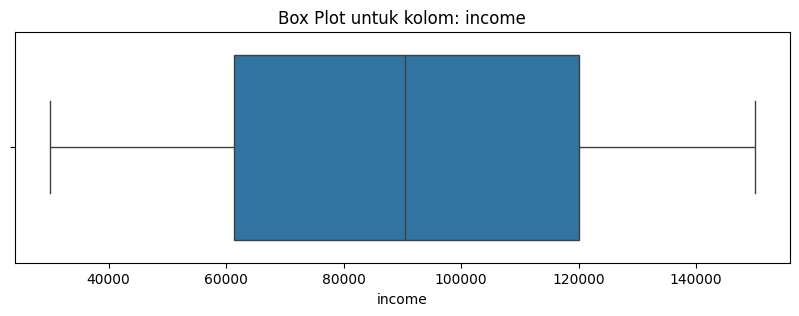

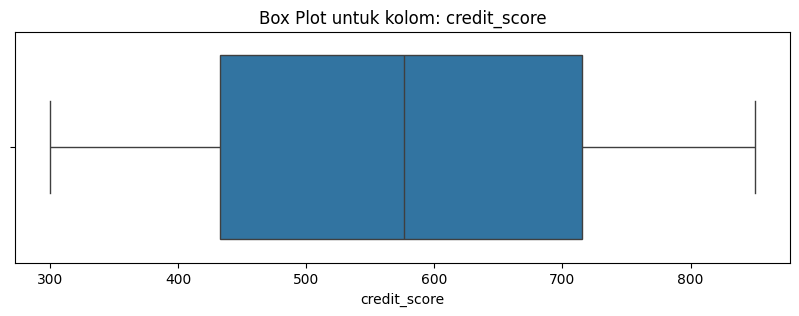

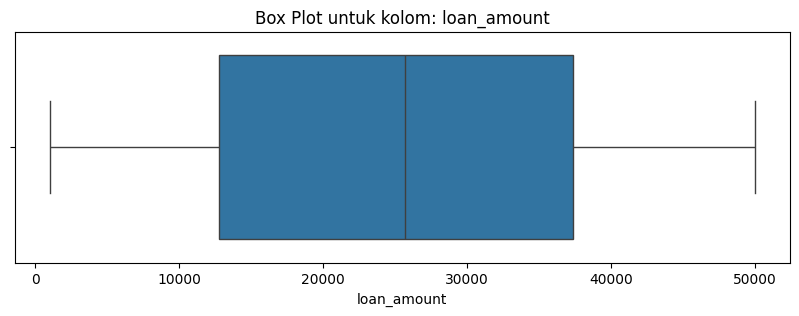

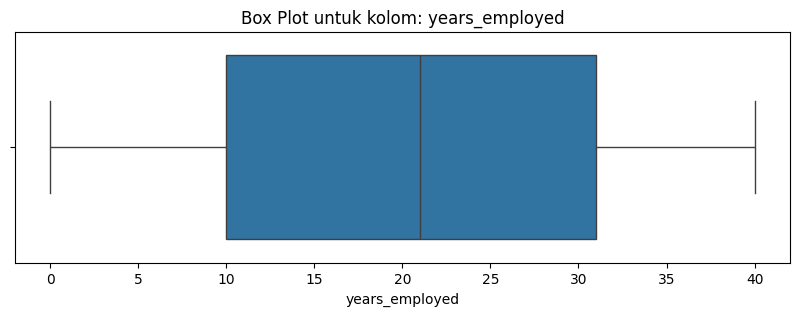

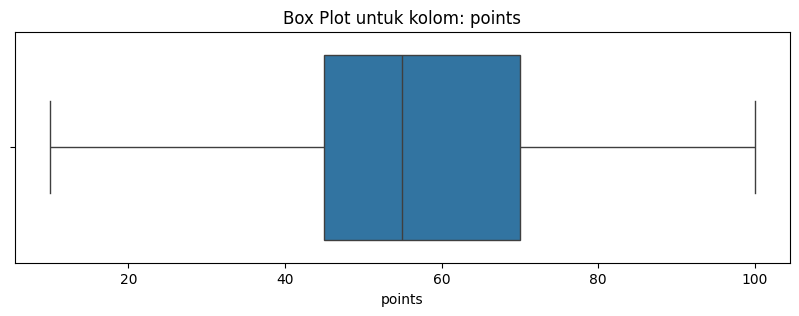

In [34]:
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df_raw[col])
    plt.title(f'Box Plot untuk kolom: {col}')
    plt.show()

Distribusi Kolom Numerik (Histogram)


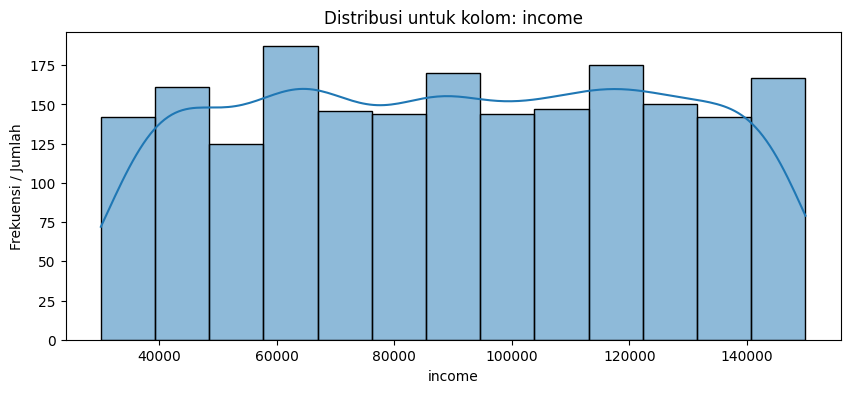

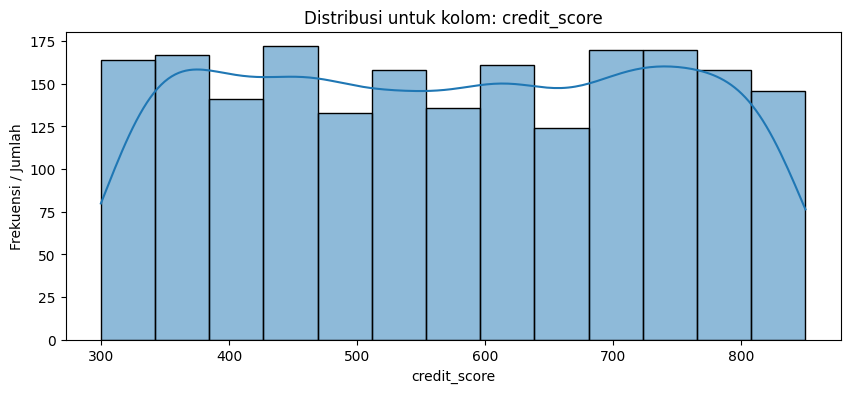

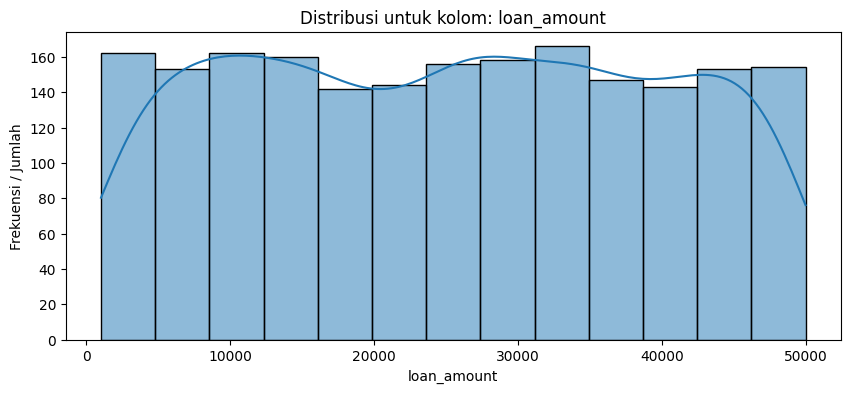

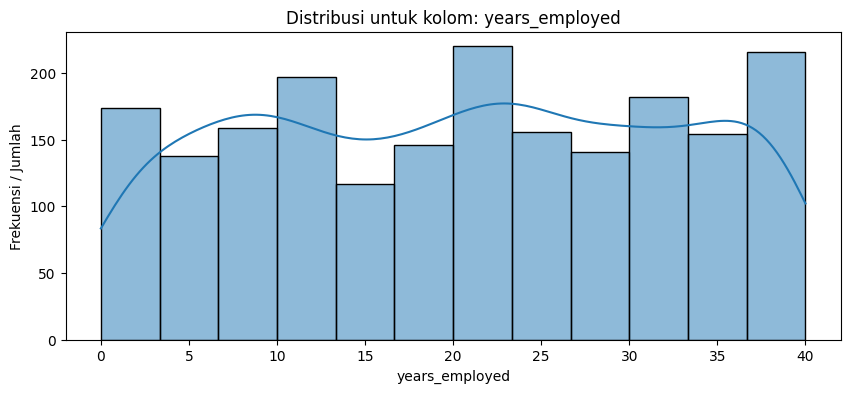

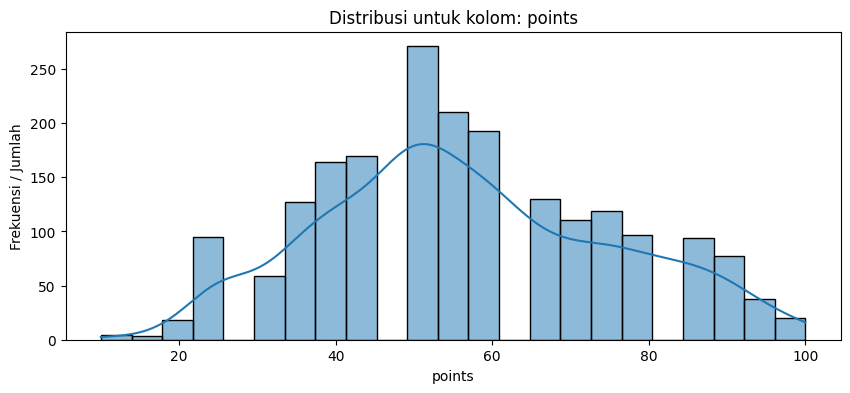

In [35]:
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

print("Distribusi Kolom Numerik (Histogram)")
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_raw[col], kde=True)
    plt.title(f'Distribusi untuk kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi / Jumlah')
    plt.show()

Untuk kolom name dan city tidak saya include karena kolom 'Name' dan 'City' adalah fitur kategorikal dengan kardinalitas yang sangat tinggi (high cardinality). Kolom 'Name' kemungkinan besar adalah identifier unik yang tidak memiliki nilai prediktif, dan kedua kolom tersebut tidak cocok untuk analisis statistik serta akan didrop saat preprocess.

Distribusi Kolom Target (Bar Chart)


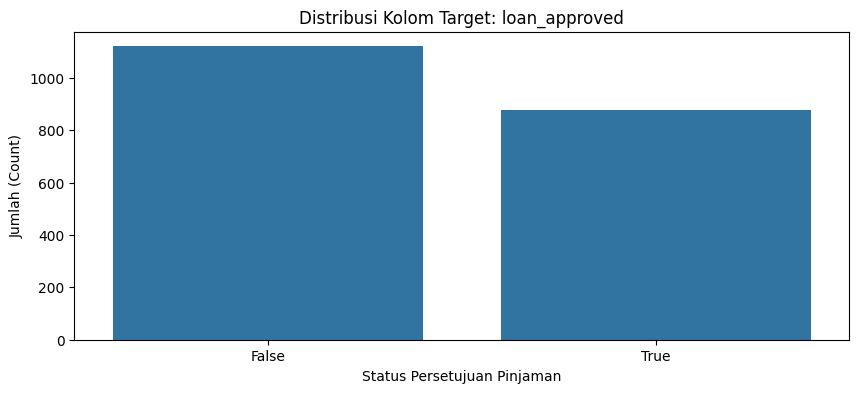

In [36]:
target_col = 'loan_approved' 

print("Distribusi Kolom Target (Bar Chart)")

plt.figure(figsize=(10, 4))

sns.countplot(data=df_raw, 
              x=target_col, 
              order=df_raw[target_col].value_counts().index)

plt.title(f'Distribusi Kolom Target: {target_col}')
plt.xlabel('Status Persetujuan Pinjaman') 
plt.ylabel('Jumlah (Count)')

plt.show()

Visualisasi Heatmap Korelasi


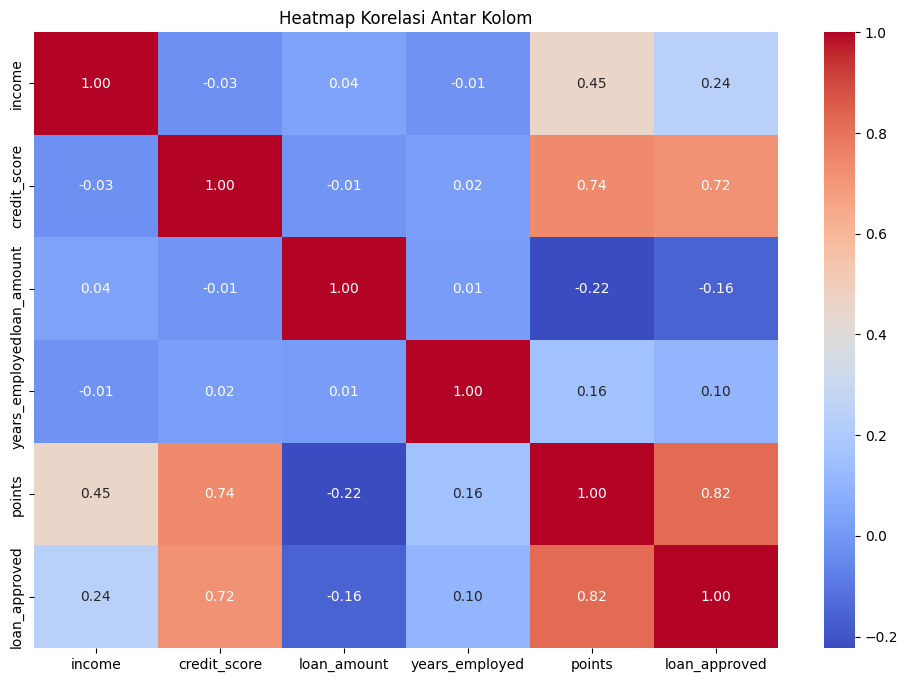

In [37]:
# Analisis Korelasi Antar Kolom
numeric_df = df_raw.select_dtypes(include=['int64', 'float64', 'bool'])

corr_matrix = numeric_df.corr()

# Visualisasi Heatmap
print("Visualisasi Heatmap Korelasi")
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,
    cmap='coolwarm',# Palet warna (merah=positif, biru=negatif)
    fmt='.2f'
)
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

Untuk kolom name dan city tidak saya include karena kolom 'Name' dan 'City' adalah fitur kategorikal dengan kardinalitas yang sangat tinggi (high cardinality). Kolom 'Name' kemungkinan besar adalah identifier unik yang tidak memiliki nilai prediktif, dan kedua kolom tersebut tidak cocok untuk analisis statistik serta akan didrop saat preprocess.

# **5. Data Preprocessing**

Dikarenakan dataset ini sudah saya cek tidak ada missing values, data yang duplikat, dan outlier, maka tidak ada penanganan untuk tahapan tersebut. Serta karena fitur name dan city akan didrop karena berkardinalitas tinggi, jadi tidak ada encoding data kategorikal dan juga dikarenakan pada dataset saya relatif sudah baik, tidak ada outlier dan data yang skewed maka saya tidak meelakukan binning, ditakutkan jika dibinning malah menyebabkan hilangnya informasi detail pada data. Maka dari itu opsi terbaik untuk tahapan preprocess terhadap data ini saya hanya akan melakukan splitting data dan normalisasi.

In [39]:
df_processed = df_raw.copy()

# Menghapus kolom 'name' dan 'city' (kardinalitas tinggi/identifier)
df_processed = df_processed.drop(['name', 'city'], axis=1)

In [40]:
# Mengubah 'loan_approved' (boolean) menjadi integer (0 atau 1)
df_processed['loan_approved'] = df_processed['loan_approved'].astype(int)

In [41]:
# Pemisahan fitur dan target
features = ['income', 'credit_score', 'loan_amount', 'years_employed', 'points']
target = 'loan_approved'

X = df_processed[features]
y = df_processed[target]

# Train-test split (dilakukan sebelum normalisasi)
# Membagi data menjadi 80% train dan 20% test
# stratify=y memastikan proporsi target sama di train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran data setelah split:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Ukuran data setelah split:
X_train: (1600, 5), y_train: (1600,)
X_test: (400, 5), y_test: (400,)


In [42]:
# Normalisasi dengan Min-Max Scaling
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler hanya pada data training (X_train)
scaler.fit(X_train)

# Transform data training dan data testing menggunakan scaler yang sudah di-fit
X_train_scaled_array = scaler.transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

# Konversi kembali ke DataFrame (mempertahankan nama kolom dan index)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=features, index=X_test.index)

# Menggabungkan fitur train yang sudah di-scale dengan target train
df_train_final = pd.concat([X_train_scaled, y_train], axis=1)

# Menggabungkan fitur test yang sudah di-scale dengan target test
df_test_final = pd.concat([X_test_scaled, y_test], axis=1)

print("Contoh data final train (scaled features + target):")
print(df_train_final.head())
print("-" * 30)
print("Contoh data final test (scaled features + target):")
print(df_test_final.head())

Contoh data final train (scaled features + target):
        income  credit_score  loan_amount  years_employed    points  \
1805  0.458045      0.641818     0.503436           0.175  0.500000   
1117  0.441937      0.730909     0.137444           0.925  0.777778   
1863  0.641014      0.334545     0.598384           0.950  0.444444   
261   0.289506      0.803636     0.248466           0.925  0.777778   
1144  0.812207      0.989091     0.134949           0.425  1.000000   

      loan_approved  
1805              0  
1117              1  
1863              0  
261               1  
1144              1  
------------------------------
Contoh data final test (scaled features + target):
        income  credit_score  loan_amount  years_employed    points  \
916   0.583844      0.645455     0.938098           0.475  0.555556   
795   0.272154      0.301818     0.520204           0.625  0.277778   
1850  0.054883      0.978182     0.292290           0.275  0.611111   
1333  0.629922      0.7

In [44]:
output_folder = "loan_approval_preprocessing"

os.makedirs(output_folder, exist_ok=True)

train_output_path = os.path.join(output_folder, 'loan_approval_train_preprocessing.csv')
test_output_path = os.path.join(output_folder, 'loan_approval_test_preprocessing.csv')

# Simpan DataFrame ke path yang sudah ditentukan
df_train_final.to_csv(train_output_path, index=False)
df_test_final.to_csv(test_output_path, index=False)